In [2]:
import tensorflow as tf
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
seed=42

np.random.seed(seed)
tf.random.set_seed(seed)

XOR

In [5]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

In [14]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

deep_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',metrics=['accuracy'])
deep_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
deep_model.fit(x,y,epochs=500, batch_size=1,verbose=0)



In [17]:
deep_model.predict(x).round(4) # 반올림해서 4자리까지

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([[0.0319],
       [0.8288],
       [0.9929],
       [0.0093]], dtype=float32)

In [18]:
scores=deep_model.evaluate(x,y)
print('모델 정확도:',scores[1]*100,'%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.0592
모델 정확도: 100.0 %


In [20]:
#task 이것도 분류해봐라하심
x=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y=np.array([[0],[0],[1],[0],[1],[0],[1],[0]])

In [27]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2,activation='relu',input_shape=(3,)),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

deep_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',metrics=['accuracy'])
deep_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
deep_model.fit(x,y,epochs=20, batch_size=1,verbose=0)

In [29]:
deep_model.predict(x).round(4) # 반올림해서 4자리까지

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.4736],
       [0.1565],
       [0.5827],
       [0.1119],
       [0.7366],
       [0.1667],
       [0.8128],
       [0.2028]], dtype=float32)

In [30]:
scores=deep_model.evaluate(x,y)
print('모델 정확도:',scores[1]*100,'%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.2991
모델 정확도: 100.0 %


회귀문제
f=0.2+0.4x^2+0.3xsin(15x)+0.05.np.cos(40*x)

In [32]:
def func(x):
  y=0.2+0.4*x**2+0.3*x*np.sin(15*x)+0.05*np.cos(40*x)
  return y

x=np.linspace(0,1,100)
y=func(x)

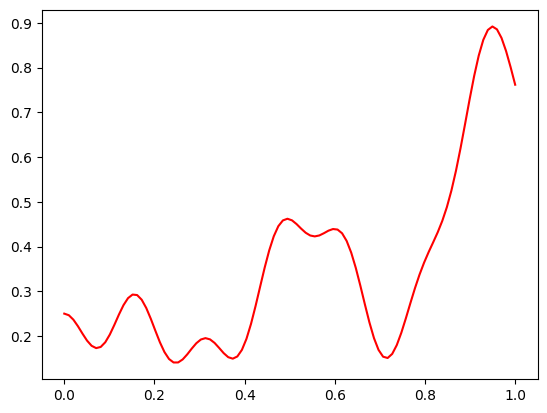

In [33]:
import matplotlib.pyplot as plt

fig=plt.figure()
plt.plot(x,y,'r')

plt.show()

In [39]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu',input_shape=(1,)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [40]:
model.compile(optimizer='adam',loss='mse')
model.fit(x,y,epochs=400,verbose=1,batch_size=1)

Epoch 1/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0354
Epoch 2/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0223
Epoch 3/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221
Epoch 4/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220
Epoch 5/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220
Epoch 6/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220
Epoch 7/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219
Epoch 8/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219
Epoch 9/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219
Epoch 10/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219
Epoch 11/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218
Epoch 12/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218
Epoch 13/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217
Epoch 14/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217
Epoch 15/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0